# Lego US sales Data analysis

## Tasks to solve

- How have the size of sets changed over time?
- What colors are associated with witch themes? Could you predict which theme a set is from just by the bricks it contains?
- What sets have the most-used pieces in them? What sets have the rarest pieces in them?
- Have the colors of LEGOs included in sets changed over time?

In [1]:
# Use this cell to begin your analyses, and add as many cells as you would like!
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/lego_sets.csv')
parent_theme = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/parent_themes.csv')

In [4]:
df.head(20)

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
5,0014-1,Space Mini-Figures,1979,12.0,Supplemental,Space
6,0015-1,Space Mini-Figures,1979,NaN,Supplemental,Space
7,0016-1,Castle Mini Figures,1978,NaN,Castle,Castle
8,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland
9,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland


In [5]:
parent_theme.head(20)

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
5,147,Pirates,False
6,155,Modular Buildings,False
7,158,Star Wars,True
8,186,Castle,False
9,204,Designer Sets,False


# What percentage of all licensed sets ever resleased were star wars themed?

In [6]:
merged = df.merge(parent_theme, left_on='parent_theme', right_on='name' )

In [7]:
merged.head(10)

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,Legoland,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,Legoland,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,Legoland,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,Legoland,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,Legoland,False
5,102A-1,Front-End Loader,1970,64.0,Construction,Legoland,411,Legoland,False
6,102A-2,Front-End Loader,1970,NaN,Construction,Legoland,411,Legoland,False
7,1-10,Mini-Wheel Model Maker No. 1,1971,88.0,Vehicle,Legoland,411,Legoland,False
8,1550-1,Sterling Super Caravelle,1972,NaN,Airport,Legoland,411,Legoland,False
9,1551-2,Sterling Luggage Carrier,1972,49.0,Airport,Legoland,411,Legoland,False


In [8]:
merged.drop(columns='name_y', inplace=True)

In [9]:
merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [10]:
licensed = merged[merged['is_licensed']]

In [11]:
licensed

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True
...,...,...,...,...,...,...,...,...
11981,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True
11982,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True
11983,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True
11984,8518-1,Jet Ray,2010,NaN,Ben 10,Ben 10,270,True


In [12]:
star_wars = licensed[licensed['parent_theme']=='Star Wars']

In [13]:
star_wars

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True
...,...,...,...,...,...,...,...,...
4097,VP-12,Star Wars Co-Pack of 7121 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,True
4098,VP-2,Star Wars Co-Pack of 7110 and 7144,2001,2.0,Star Wars Episode 4/5/6,Star Wars,158,True
4099,VP-3,Star Wars Co-Pack of 7131 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,True
4100,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,3.0,Star Wars Episode 1,Star Wars,158,True


In [20]:
merged[merged['set_num'].isnull()].shape

(153, 8)

In [21]:
licensed = licensed.dropna(subset=['set_num'])

In [22]:
the_force = int(star_wars.shape[0]/ licensed.shape[0]*100)

In [23]:
print(the_force)

51


# In which year was star wars not the most popular licensed theme

In [24]:
licensed = licensed.dropna(subset=['set_num'])
licensed.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [28]:
licensed_sorted = licensed.sort_values("year")
licensed_sorted['count'] = 1

In [31]:
summed_df = licensed_sorted.groupby(["year", 'parent_theme']).sum().reset_index()

In [32]:
summed_df.head()

,year,parent_theme,num_parts,id,is_licensed,count
0,1999,Star Wars,1384.0,2054,13,13
1,2000,Disney's Mickey Mouse,405.0,1940,5,5
2,2000,Star Wars,2580.0,4108,26,26
3,2001,Harry Potter,1284.0,2706,11,11
4,2001,Star Wars,2949.0,2212,14,14


In [35]:
max_df = summed_df.sort_values('count', ascending=False).drop_duplicates(['year'])

In [36]:
max_df

,year,parent_theme,num_parts,id,is_licensed,count
82,2017,Super Heroes,13123.0,34704,72,72
76,2016,Star Wars,6934.0,9638,61,61
67,2015,Star Wars,11410.0,9164,58,58
59,2014,Star Wars,8293.0,7110,45,45
47,2012,Star Wars,6769.0,6794,43,43
32,2009,Star Wars,3953.0,6162,39,39
52,2013,Star Wars,6159.0,5530,35,35
9,2003,Star Wars,6660.0,5056,32,32
42,2011,Star Wars,3451.0,5056,32,32
36,2010,Star Wars,6003.0,4740,30,30


In [37]:
max_df.sort_values("year")

,year,parent_theme,num_parts,id,is_licensed,count
0,1999,Star Wars,1384.0,2054,13,13
2,2000,Star Wars,2580.0,4108,26,26
4,2001,Star Wars,2949.0,2212,14,14
6,2002,Star Wars,4735.0,4424,28,28
9,2003,Star Wars,6660.0,5056,32,32
12,2004,Star Wars,1659.0,3160,20,20
16,2005,Star Wars,4730.0,4424,28,28
20,2006,Star Wars,2769.0,1738,11,11
24,2007,Star Wars,11361.0,2528,16,16
28,2008,Star Wars,6865.0,3634,23,23


In [38]:
new_era = 2017

# Breakdown number of sets by year

In [41]:
cleaned_df = merged[~merged['set_num'].isnull()]

In [42]:
cleaned_df.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [43]:
cleaned_df['count'] = 1
cleaned_df.head()

/var/folders/c0/sj969k_x7xs_y65cm0gnh58c0000gn/T/ipykernel_10407/586856316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['count'] = 1


,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed,count
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False,1
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False,1
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False,1
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False,1
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False,1


In [44]:
sets_per_year = cleaned_df.groupby(['year']).sum().reset_index()[['year','count']]

In [45]:
sets_per_year

,year,count
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12
...,...,...
61,2013,593
62,2014,715
63,2015,670
64,2016,608


In [50]:
for key, values in sets_per_year.iterrows():
    print(values['year'], values['count'])

1950 7
1953 4
1954 14
1955 28
1956 12
1957 21
1958 42
1959 4
1960 3
1961 17
1962 40
1963 18
1964 11
1965 10
1966 89
1967 21
1968 25
1969 69
1970 29
1971 45
1972 38
1973 68
1974 39
1975 31
1976 68
1977 92
1978 73
1979 82
1980 88
1981 79
1982 76
1983 57
1984 76
1985 139
1986 123
1987 209
1988 68
1989 114
1990 85
1991 106
1992 115
1993 111
1994 128
1995 128
1996 144
1997 194
1998 325
1999 300
2000 327
2001 339
2002 447
2003 415
2004 371
2005 330
2006 283
2007 319
2008 349
2009 403
2010 444
2011 502
2012 615
2013 593
2014 715
2015 670
2016 608
2017 438


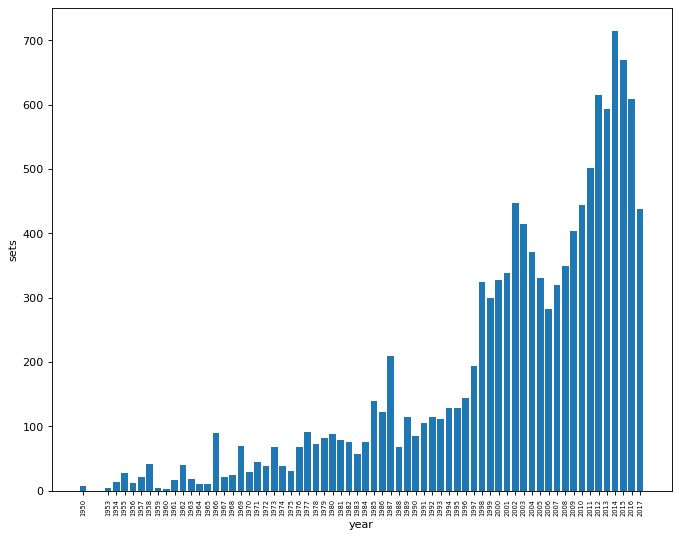

In [58]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

plt.bar(sets_per_year['year'], sets_per_year['count'])
plt.xticks(sets_per_year['year'], rotation = 'vertical', size=6)
plt.xlabel('year')
plt.ylabel('sets')
plt.show()